In [1]:
import pandas as pd
df = pd.read_csv('data/Pokemon.csv')
# prepare data
types = df['Type 1'].isin(['Grass', 'Fire', 'Water'])
drop_cols = ['Type 1', 'Type 2', 'Generation', 'Legendary', '#']
df = df[types].drop(columns = drop_cols)
df.head()

,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,Bulbasaur,318,45,49,49,65,65,45
1,Ivysaur,405,60,62,63,80,80,60
2,Venusaur,525,80,82,83,100,100,80
3,VenusaurMega Venusaur,625,80,100,123,122,120,80
4,Charmander,309,39,52,43,60,50,65


In [5]:
from sklearn.cluster import KMeans
import numpy as np
# k means
kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(df[['Attack', 'Defense']])
# get centroids
centroids = kmeans.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
df['cen_x'] = df.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
df['cen_y'] = df.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#79AEA3', '#4993C8', '#DB5461']
df['c'] = df.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

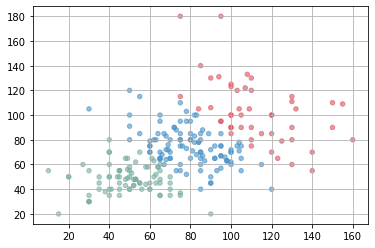

In [10]:
import matplotlib.pyplot as plt
plt.grid()
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=20)

(0.0, 200.0)

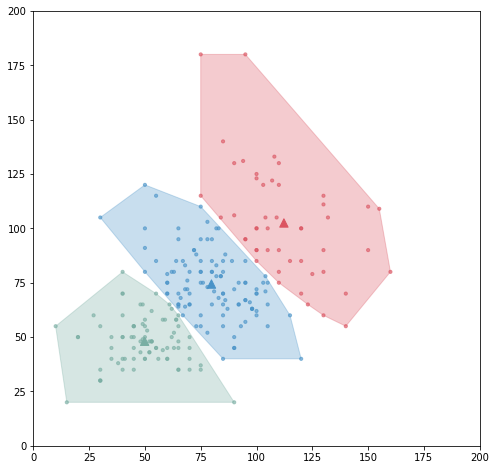

In [11]:
from scipy.spatial import ConvexHull
import numpy as np
fig, ax = plt.subplots(1, figsize=(8,8))
# plot data
plt.scatter(df.Attack, df.Defense, c=df.c, alpha = 0.6, s=10)
# plot centers
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
# draw enclosure
for i in df.cluster.unique():
    points = df[df.cluster == i][['Attack', 'Defense']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # plot shape
    plt.fill(x_hull, y_hull, alpha=0.3, c=colors[i])
    
plt.xlim(0,200)
plt.ylim(0,200)

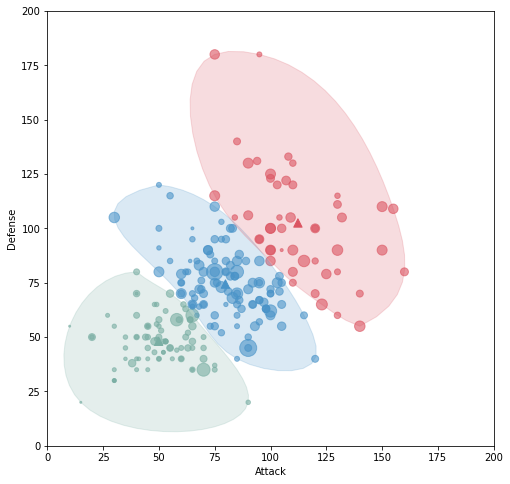

In [30]:
from scipy import interpolate
fig, ax = plt.subplots(1, figsize=(8,8))

s = [s**2/100 for s in df['HP']]

plt.scatter(df.Attack, df.Defense, c=df.c, alpha=0.6, s=s)
plt.scatter(cen_x, cen_y, marker='^', c=colors, s=70)
    
for i in df.cluster.unique():
    # get the convex hull
    points = df[df.cluster == i][['Attack', 'Defense']].values
    hull = ConvexHull(points)
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    
    # plot shape
    plt.fill(interp_x, interp_y, '--', c=colors[i], alpha=0.2)
    
plt.xlim(0,200)
plt.ylim(0,200)
plt.xlabel('Attack')
plt.ylabel('Defense')
fig.savefig('scatter_1.png', bbox_inches='tight', transparent=True)

In [23]:
df.columns

Index(['Name', 'Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def',
       'Speed', 'cluster', 'cen_x', 'cen_y', 'c'],
      dtype='object')

In [24]:
df['HP']

0       45
1       60
2       80
3       80
4       39
      ... 
740     66
741    123
762     50
763     71
799     80
Name: HP, Length: 234, dtype: int64